In [ ]:
# importig the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

In [ ]:
# Load the dataset
reddit_title = pd.read_csv('/content/Reddit_Title (1).csv')

In [ ]:
reddit_title.head() # printing the first five rows of the dataset

,title,label
0,My aunt and uncle scoring their first gig as professional taqueros! They were very happy grinning face with big eyes,0
1,How do I stop stressing about work when I'm at home?,1
2,Meeting a fellow suicidal student in middle school changed my outlook on life. You really never know what's going on with someone. This is a reminder to just be kind when you can because you don't know what's happening under the surface.,1
3,My brain feels literally numb. Is this depression?,1
4,A mother's reaction after seeing her son has passed the bar exam,0


In [ ]:
reddit_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5556 non-null   object
 1   label   5556 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.9+ KB


In [ ]:
reddit_title.isnull().sum() # checking for the null values

,0
title,0
label,0


In [ ]:
reddit_title.duplicated().sum()

np.int64(24)

In [ ]:
reddit_title=reddit_title.drop_duplicates()

In [ ]:
reddit_title.duplicated().sum()

np.int64(0)

In [ ]:
reddit_title['label'].value_counts()

,count
label,
0,2811
1,2721


In [ ]:
reddit_title['label'].value_counts(normalize=True) * 100

,proportion
label,
0,50.813449
1,49.186551


In [ ]:
reddit_title['title']=reddit_title['title'].str.lower()

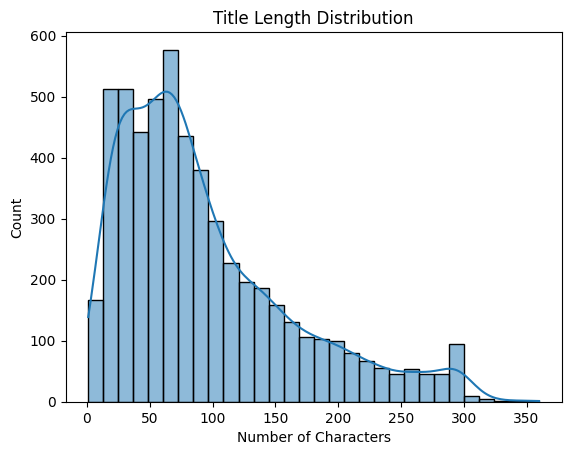

In [ ]:
reddit_title['text_length'] = reddit_title['title'].apply(len)
sns.histplot(reddit_title['text_length'], bins=30, kde=True)
plt.title("Title Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

In [ ]:
stress_text = " ".join(reddit_title[reddit_title['label'] == 1]['title'])
nonstress_text = " ".join(reddit_title[reddit_title['label'] == 0]['title'])

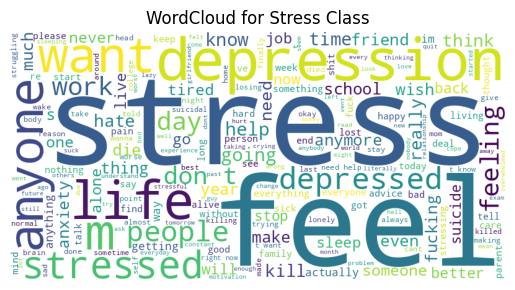

In [ ]:
wc = WordCloud(width=800, height=400, background_color='white').generate(stress_text)
plt.imshow(wc)
plt.axis('off')
plt.title("WordCloud for Stress Class")
plt.show()

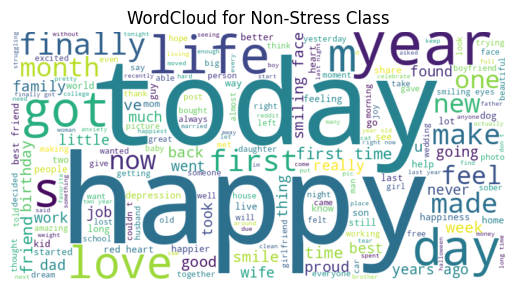

In [ ]:
wc = WordCloud(width=800, height=400, background_color='white').generate(nonstress_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Non-Stress Class")
plt.show()

In [ ]:
# importig the libraries
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
reddit_title.head(10) # printing the first five rows of the dataset

,title,label,text_length
0,my aunt and uncle scoring their first gig as professional taqueros! they were very happy grinning face with big eyes,0,116
1,how do i stop stressing about work when i'm at home?,1,52
2,meeting a fellow suicidal student in middle school changed my outlook on life. you really never know what's going on with someone. this is a reminder to just be kind when you can because you don't know what's happening under the surface.,1,237
3,my brain feels literally numb. is this depression?,1,50
4,a mother's reaction after seeing her son has passed the bar exam,0,64
5,"my brother just self-published a children’s book so his daughter, who was born with a limb difference, could see someone like her as the hero of a story. i’m just so dang proud.",0,177
6,being an ugly/awkward girl really does make life difficult,1,58
7,how the fuck am i supposed to pass my exams if i cant stop thinking about killing myself for 5 minutes,1,102
8,i hung out with friends for my birthday after years of spending birthdays alone.,0,80
9,after today,1,11


In [ ]:
reddit_title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5532 entries, 0 to 5555
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        5532 non-null   object
 1   label        5532 non-null   int64 
 2   text_length  5532 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 172.9+ KB


In [ ]:
reddit_title.isnull().sum() # checking for the null values

,0
title,0
label,0
text_length,0


In [ ]:
reddit_title['label'].value_counts()

,count
label,
0,2811
1,2721


In [ ]:
reddit_title['label'].value_counts(normalize=True) * 100

,proportion
label,
0,50.813449
1,49.186551


In [ ]:
reddit_title['title']=reddit_title['title'].str.lower()

In [ ]:
reddit_title['title']=reddit_title['title'].str.replace(r'\d+', '', regex=True) #remove numbers
reddit_title.head(10)

,title,label,text_length
0,my aunt and uncle scoring their first gig as professional taqueros! they were very happy grinning face with big eyes,0,116
1,how do i stop stressing about work when i'm at home?,1,52
2,meeting a fellow suicidal student in middle school changed my outlook on life. you really never know what's going on with someone. this is a reminder to just be kind when you can because you don't know what's happening under the surface.,1,237
3,my brain feels literally numb. is this depression?,1,50
4,a mother's reaction after seeing her son has passed the bar exam,0,64
5,"my brother just self-published a children’s book so his daughter, who was born with a limb difference, could see someone like her as the hero of a story. i’m just so dang proud.",0,177
6,being an ugly/awkward girl really does make life difficult,1,58
7,how the fuck am i supposed to pass my exams if i cant stop thinking about killing myself for minutes,1,102
8,i hung out with friends for my birthday after years of spending birthdays alone.,0,80
9,after today,1,11


In [ ]:
reddit_title['title'] = reddit_title['title'].str.replace(r'[^\w\s]', '', regex=True) # removes punctuation
reddit_title.head(10)

,title,label,text_length
0,my aunt and uncle scoring their first gig as professional taqueros they were very happy grinning face with big eyes,0,116
1,how do i stop stressing about work when im at home,1,52
2,meeting a fellow suicidal student in middle school changed my outlook on life you really never know whats going on with someone this is a reminder to just be kind when you can because you dont know whats happening under the surface,1,237
3,my brain feels literally numb is this depression,1,50
4,a mothers reaction after seeing her son has passed the bar exam,0,64
5,my brother just selfpublished a childrens book so his daughter who was born with a limb difference could see someone like her as the hero of a story im just so dang proud,0,177
6,being an uglyawkward girl really does make life difficult,1,58
7,how the fuck am i supposed to pass my exams if i cant stop thinking about killing myself for minutes,1,102
8,i hung out with friends for my birthday after years of spending birthdays alone,0,80
9,after today,1,11


In [ ]:
reddit_title['title'] = reddit_title['title'].apply(word_tokenize)

In [ ]:
stop_words = set(stopwords.words('english'))
def removestopwords(tokens):
    return [w for w in tokens if w.lower() not in stop_words]
reddit_title['title'] = reddit_title['title'].apply(removestopwords)

In [ ]:
reddit_title['title'] = reddit_title['title'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
reddit_title.head(10)

,title,label,text_length
0,aunt uncle scoring first gig professional taqueros happy grinning face big eyes,0,116
1,stop stressing work im home,1,52
2,meeting fellow suicidal student middle school changed outlook life really never know whats going someone reminder kind dont know whats happening surface,1,237
3,brain feels literally numb depression,1,50
4,mothers reaction seeing son passed bar exam,0,64
5,brother selfpublished childrens book daughter born limb difference could see someone like hero story im dang proud,0,177
6,uglyawkward girl really make life difficult,1,58
7,fuck supposed pass exams cant stop thinking killing minutes,1,102
8,hung friends birthday years spending birthdays alone,0,80
9,today,1,11


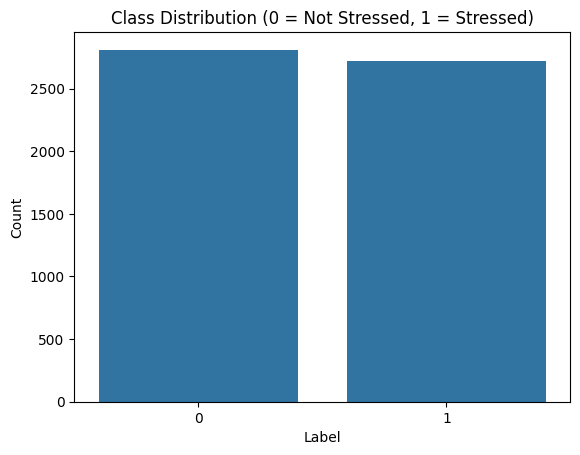

In [ ]:
# Class distribution
sns.countplot(x='label', data=reddit_title)
plt.title("Class Distribution (0 = Not Stressed, 1 = Stressed)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

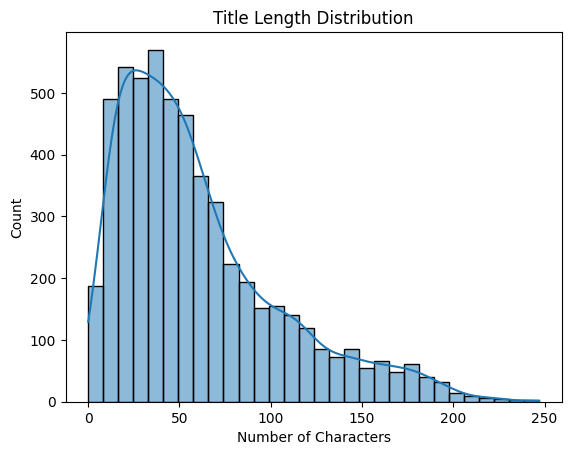

In [ ]:
# Title length distribution
reddit_title['text_length'] = reddit_title['title'].apply(len)
sns.histplot(reddit_title['text_length'], bins=30, kde=True)
plt.title("Title Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

In [ ]:
stress_text = " ".join(reddit_title[reddit_title['label'] == 1]['title'])
nonstress_text = " ".join(reddit_title[reddit_title['label'] == 0]['title'])

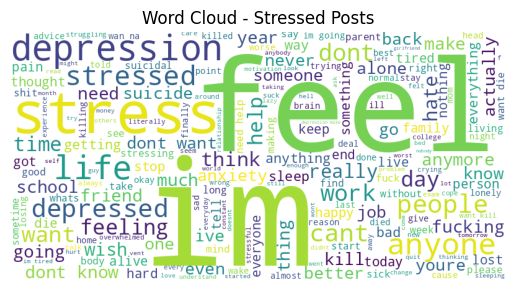

In [ ]:
# Stressed posts wordcloud
stressed = WordCloud(width=800, height=400, background_color='white').generate(stress_text)
plt.imshow(stressed)
plt.axis("off")
plt.title("Word Cloud - Stressed Posts")
plt.show()

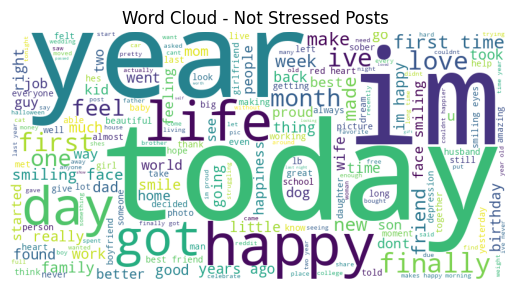

In [ ]:
# Not Stressed posts wordcloud
notstressed = WordCloud(width=800, height=400, background_color='white').generate(nonstress_text)
plt.imshow(notstressed)
plt.axis("off")
plt.title("Word Cloud - Not Stressed Posts ")
plt.show()

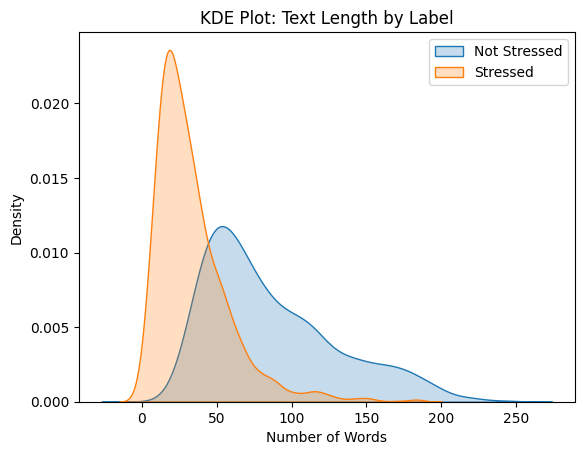

In [ ]:
sns.kdeplot(reddit_title[reddit_title["label"] == 0]["text_length"], label="Not Stressed", fill=True)
sns.kdeplot(reddit_title[reddit_title["label"] == 1]["text_length"], label="Stressed", fill=True)
plt.title("KDE Plot: Text Length by Label")
plt.xlabel("Number of Words")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(reddit_title, test_size=0.2)

In [ ]:
# preprocess the data
from transformers import AutoTokenizer
from datasets import Dataset

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples['title'], truncation=True, padding=True, max_length=512)

# Convert pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_data)
test_dataset = Dataset.from_pandas(test_data)

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/4425 [00:00<?, ? examples/s]

Map:   0%|          | 0/1107 [00:00<?, ? examples/s]

In [ ]:
# Load the Pre-trained DistilBERT Model
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train the Model
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipython-input-2515956608.py:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.065600,0.193587
2,0.032000,0.212082
3,0.018000,0.235846


TrainOutput(global_step=417, training_loss=0.03853604033124818, metrics={'train_runtime': 71.0429, 'train_samples_per_second': 186.859, 'train_steps_per_second': 5.87, 'total_flos': 157981344068232.0, 'train_loss': 0.03853604033124818, 'epoch': 3.0})

In [ ]:
#Evaluate the Model
results = trainer.evaluate()
print(f"Evaluation Results: {results}")

Evaluation Results: {'eval_loss': 0.23584581911563873, 'eval_runtime': 1.4038, 'eval_samples_per_second': 788.572, 'eval_steps_per_second': 24.932, 'epoch': 3.0}


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions (logits) from the trainer on test dataset
predictions_output = trainer.predict(tokenized_test)

# predictions_output.predictions are logits; get predicted classes by taking argmax
y_pred = np.argmax(predictions_output.predictions, axis=1)

# True labels
y_true = predictions_output.label_ids

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[542  26]
 [ 32 507]]


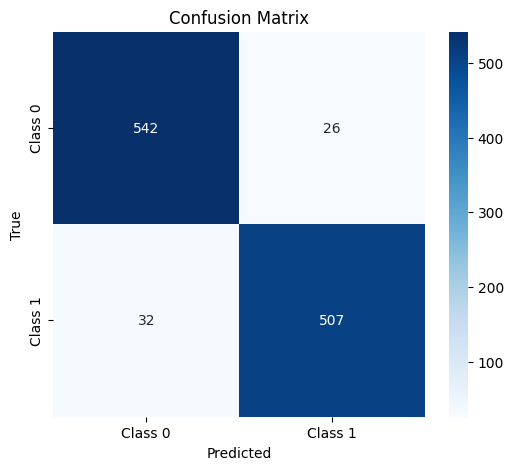

In [ ]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
